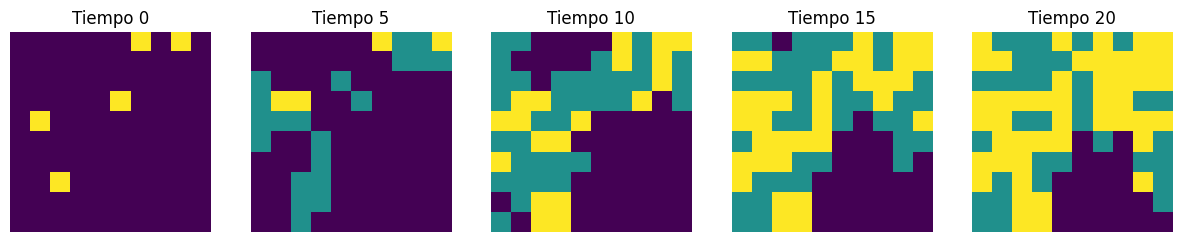

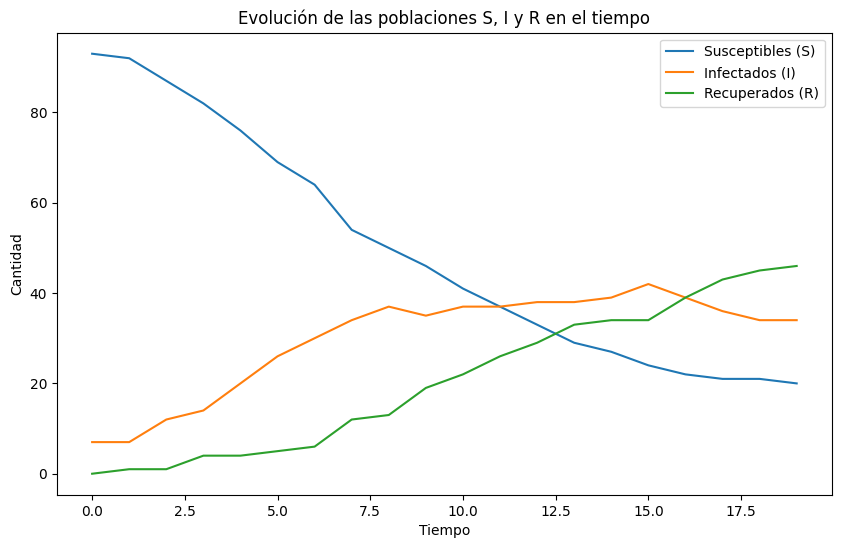

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    return historial_grids, historial_SIR

# Parámetros de ejemplo
M, N = 10, 10  # Tamaño del grid
T = 20         # Tiempo de simulación
I0 = 5         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.5     # Probabilidad de infección
gamma = 0.1    # Probabilidad de recuperación


# Ejecutar simulación
historial_grids, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)

# Graficar evolución del grid
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
time_points = [0, 5, 10, 15, 20]  # Puntos de tiempo dentro del rango de la simulación

for ax, t in zip(axes, time_points):
    ax.imshow(historial_grids[t], cmap='viridis')
    ax.set_title(f'Tiempo {t}')
    ax.axis('off')

plt.show()


# Graficar la cantidad de S, I y R en el tiempo
S_values, I_values, R_values = zip(*historial_SIR)

plt.figure(figsize=(10, 6))
plt.plot(S_values, label='Susceptibles (S)')
plt.plot(I_values, label='Infectados (I)')
plt.plot(R_values, label='Recuperados (R)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Evolución de las poblaciones S, I y R en el tiempo')
plt.show()


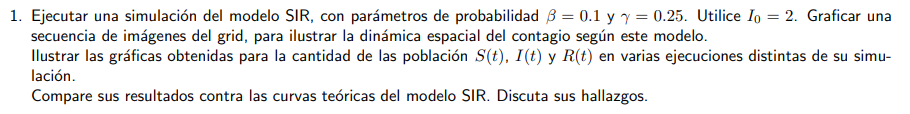

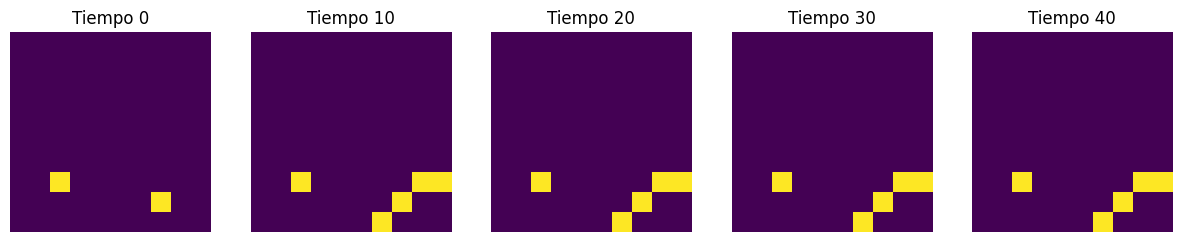

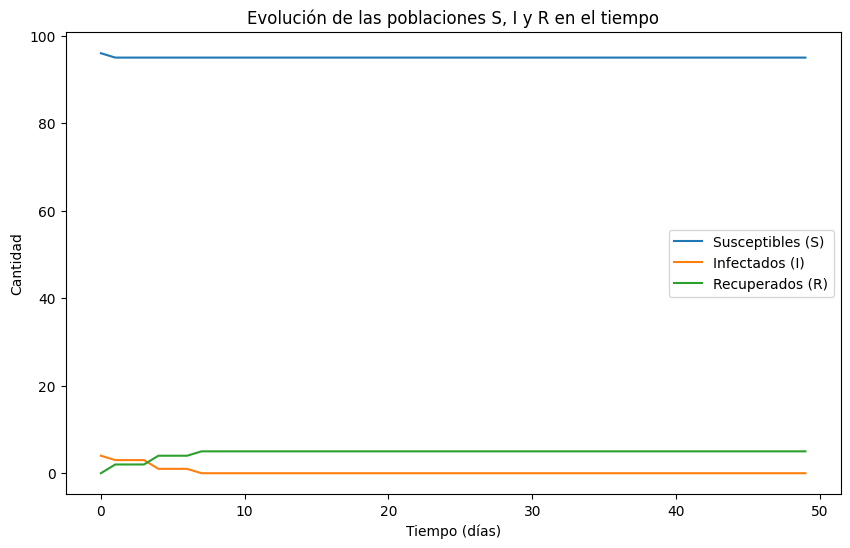

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    return historial_grids, historial_SIR

# Parámetros para la simulación
M, N = 10, 10  # Tamaño del grid
T = 50         # Tiempo de simulación (días)
I0 = 2         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.1     # Probabilidad de infección
gamma = 0.25   # Probabilidad de recuperación

# Ejecutar simulación
historial_grids, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)

# Graficar evolución del grid
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
time_points = [0, 10, 20, 30, 40, 49]  # Puntos de tiempo dentro del rango de la simulación

for ax, t in zip(axes, time_points):
    ax.imshow(historial_grids[t], cmap='viridis')
    ax.set_title(f'Tiempo {t}')
    ax.axis('off')

plt.show()

# Graficar la cantidad de S, I y R en el tiempo
S_values, I_values, R_values = zip(*historial_SIR)

plt.figure(figsize=(10, 6))
plt.plot(S_values, label='Susceptibles (S)')
plt.plot(I_values, label='Infectados (I)')
plt.plot(R_values, label='Recuperados (R)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Evolución de las poblaciones S, I y R en el tiempo')
plt.show()


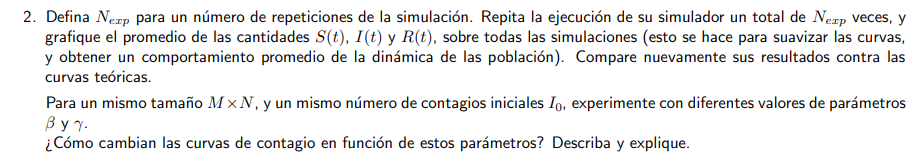

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    # Aseguramos que historial_SIR tenga exactamente T+1 pasos
    while len(historial_SIR) < T + 1:
        historial_SIR.append(historial_SIR[-1])

    return historial_grids, historial_SIR

# Promediar simulaciones
def promediar_simulaciones(Nexp, M, N, T, I0, rad, beta, gamma):
    S_totales = np.zeros(T + 1)
    I_totales = np.zeros(T + 1)
    R_totales = np.zeros(T + 1)

    for _ in range(Nexp):
        _, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)
        S_values, I_values, R_values = zip(*historial_SIR)

        S_totales += np.array(S_values)
        I_totales += np.array(I_values)
        R_totales += np.array(R_values)

    # Promediar sobre las simulaciones
    S_promedio = S_totales / Nexp
    I_promedio = I_totales / Nexp
    R_promedio = R_totales / Nexp

    return S_promedio, I_promedio, R_promedio


# Parámetros de ejemplo
M, N = 10, 10  # Tamaño del grid
T = 20         # Tiempo de simulación
I0 = 5         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.5     # Probabilidad de infección
gamma = 0.1    # Probabilidad de recuperación

# Ejecutar simulación múltiples veces y obtener promedios
S_promedio, I_promedio, R_promedio = promediar_simulaciones(Nexp, M, N, T, I0, rad, beta, gamma)

# Graficar la cantidad promedio de S, I y R en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(S_promedio, label='Susceptibles (S) Promedio')
plt.plot(I_promedio, label='Infectados (I) Promedio')
plt.plot(R_promedio, label='Recuperados (R) Promedio')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad promedio')
plt.legend()
plt.title('Promedio de las poblaciones S, I y R en el tiempo')
plt.show()


NameError: name 'Nexp' is not defined

Ejecutando experimento 1/10
Ejecutando experimento 2/10
Ejecutando experimento 3/10
Ejecutando experimento 4/10
Ejecutando experimento 5/10
Ejecutando experimento 6/10
Ejecutando experimento 7/10
Ejecutando experimento 8/10
Ejecutando experimento 9/10
Ejecutando experimento 10/10


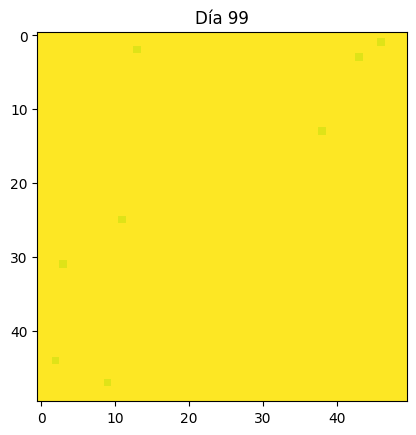

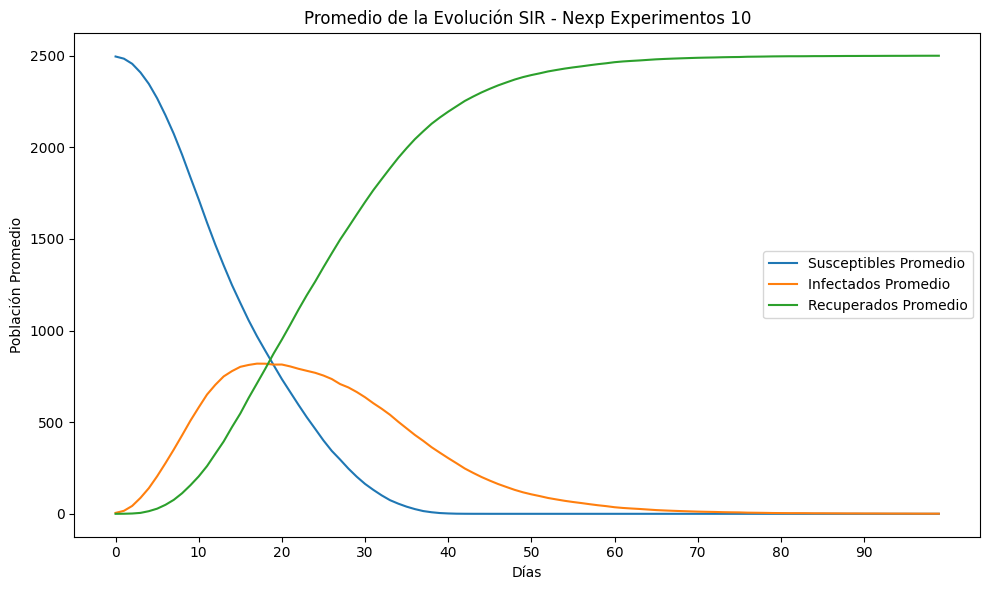

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class ModeloSIR:
    def __init__(self, M, N, beta, gamma, posiciones_infectadas, dias, rad):
        self.M = M
        self.N = N
        self.beta = beta
        self.gamma = gamma
        self.posiciones_infectadas = posiciones_infectadas
        self.dias = dias
        self.rad = rad
        self.grid = self.inicializarGrid()
        self.historialGrid = []
        self.historialSIR = []

    # Método para inicializar el grid con posiciones infectadas predefinidas
    def inicializarGrid(self):
        grid = np.zeros((self.M, self.N), dtype=int)
        for i, j in self.posiciones_infectadas:
            grid[i, j] = 1  # Marcamos la célula como infectada
        return grid

    # Método para obtener la vecindad de una celda (i, j)
    def obtenerVecindad(self, i, j):
        return self.grid[max(0, i - self.rad):min(self.M, i + self.rad + 1), max(0, j - self.rad):min(self.N, j + self.rad + 1)]

    # Método para actualizar el grid según las reglas del modelo SIR
    def actualizarGrid(self):
        nuevoGrid = self.grid.copy()
        for i in range(self.M):
            for j in range(self.N):
                if self.grid[i, j] == 0:  # Susceptible
                    vecindad = self.obtenerVecindad(i, j)
                    infectados = np.sum(vecindad == 1)
                    if infectados > 0:
                        prob_infeccion = 1 - (1 - self.beta) ** infectados
                        if random.random() < prob_infeccion:
                            nuevoGrid[i, j] = 1
                elif self.grid[i, j] == 1:  # Infectado
                    if random.random() < self.gamma:
                        nuevoGrid[i, j] = 2  # Recuperado
        self.grid = nuevoGrid

    # Método para simular el modelo SIR durante un número de días especificado
    def simular(self):
        for _ in range(self.dias):
            self.historialGrid.append(self.grid.copy())
            self.actualizarGrid()

            # Almacena la cantidad de S, I y R
            S = np.sum(self.grid == 0)
            I = np.sum(self.grid == 1)
            R = np.sum(self.grid == 2)
            self.historialSIR.append([S, I, R])

    # Método para mostrar la evolución temporal del modelo SIR
    def graficarSIR(self):
        sir = np.array(self.historialSIR)
        plt.plot(sir[:, 0], label='Susceptibles')
        plt.plot(sir[:, 1], label='Infectados')
        plt.plot(sir[:, 2], label='Recuperados')
        plt.xlabel('Días')
        plt.ylabel('Población')
        plt.legend()
        plt.title('Modelo SIR - Evolución Temporal')
        plt.show()

    # Método para mostrar la evolución del contagio
    def animarGrid(self):
        fig, ax = plt.subplots()
        img = ax.imshow(self.historialGrid[0], cmap='viridis', vmin=0, vmax=2)

        def actualizar(frame):
            img.set_data(self.historialGrid[frame])
            ax.set_title(f'Día {frame}')
            return [img]

        ani = animation.FuncAnimation(fig, actualizar, frames=len(self.historialGrid), blit=False)
        plt.show()

# Generar un promedio de la dinámica espacial
def calcular_grid_promedio(historial_grids):
    return np.mean(historial_grids, axis=0)

# Generar el video de la dinámica promedio
def generar_video(historial_promedio, nombre_video='inciso_3.mp4'):
    fig, ax = plt.subplots()
    img = ax.imshow(historial_promedio[0], cmap='viridis', vmin=0, vmax=2)

    def actualizar(frame):
        img.set_data(historial_promedio[frame])
        ax.set_title(f'Día {frame}')
        return [img]

    ani = animation.FuncAnimation(fig, actualizar, frames=len(historial_promedio), blit=False)
    writer = animation.FFMpegWriter(fps=5)
    ani.save(nombre_video, writer=writer)

def graficar_promedio_sir(grids_historial, dias, M, N, Nexp, intervalo=10):
    S_prom = np.zeros(dias)
    I_prom = np.zeros(dias)
    R_prom = np.zeros(dias)

    for t in range(dias):
        S_prom[t] = np.mean([np.sum(grid == 0) for grid in grids_historial[:, t]])
        I_prom[t] = np.mean([np.sum(grid == 1) for grid in grids_historial[:, t]])
        R_prom[t] = np.mean([np.sum(grid == 2) for grid in grids_historial[:, t]])

    # Ajustar el tamaño de la figura para evitar compresión
    plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño aquí
    
    # Graficar la evolución promedio
    plt.plot(S_prom, label='Susceptibles Promedio')
    plt.plot(I_prom, label='Infectados Promedio')
    plt.plot(R_prom, label='Recuperados Promedio')
    
    # Etiquetas de los ejes
    plt.xlabel('Días')
    plt.ylabel('Población Promedio')

    # Título y leyenda
    plt.legend()
    plt.title(f'Promedio de la Evolución SIR - Nexp Experimentos {Nexp}')

    # Configuración para mostrar etiquetas en el eje x cada "intervalo" días
    plt.xticks(np.arange(0, dias, step=intervalo))

    # Ajustar el layout para que las etiquetas no se corten
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()


def guardar_snapshots(historial_promedio, dias_snapshot, nombre_base='snapshot'):
    for dia in dias_snapshot:
        plt.figure(figsize=(6, 6))
        plt.imshow(historial_promedio[dia], cmap='viridis', vmin=0, vmax=2)
        plt.title(f'Snapshot del Día {dia}')
        plt.colorbar(label='Estado (0=Susceptible, 1=Infectado, 2=Recuperado)')
        plt.savefig(f'./assets/{nombre_base}_dia_{dia}.png')  # Guardar la imagen
        plt.close()


if __name__ == '__main__':
    M, N = 50, 50  # Tamaño del grid
    beta = 0.3     # Probabilidad de contagio
    gamma = 0.1    # Probabilidad de recuperación
    posiciones_infectadas = [(10, 10), (20, 20), (30, 30), (40, 40), (25, 25)]  # Lista de posiciones infectadas
    dias = 100     # Número de días de simulación
    rad = 1        # Radio de interacción
    Nexp = 10      # Número de experimentos

    grids_historial = []

    # Realizar Nexp experimentos
    for exp_num in range(Nexp):
        print(f'Ejecutando experimento {exp_num + 1}/{Nexp}')
        modelo = ModeloSIR(M, N, beta, gamma, posiciones_infectadas, dias, rad)
        modelo.simular()
        grids_historial.append(modelo.historialGrid)

    grids_historial = np.array(grids_historial)
    
    # Calcular el grid promedio
    grid_promedio = calcular_grid_promedio(grids_historial)

    # Generar el video de la dinámica espacial promedio
    generar_video(grid_promedio)

    # Días específicos para capturar snapshots (por ejemplo, cada 10 días)
    dias_snapshot = np.arange(0, dias, step=10)

    # Generar y guardar los snapshots
    guardar_snapshots(grid_promedio, dias_snapshot)

    # Graficar la evolución promedio de S, I, R
    graficar_promedio_sir(grids_historial, dias, M, N, Nexp, intervalo=10)